# Analysing Childhood Obesity Rates Across London Boroughs Using Machine Learning Technologies

## 1. Library loading

Before conducting data analysis, we first need to load the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import osmnx as ox
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression as MIR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

## 2. Data collection and load data

Before collecting data by using the OpenStreetMap API, we need to define area names and Lower Layer Super Output Area(LSOA) codes for each borough in London. 

Because some boroughs do not have the facilities we need - we can explore the reasons in the future, we have to remove some boroughs (e.g. Barnet and Brent). Also, the number of facilities in each boroughs varies greatly. In this case, it is not appropriate to use mean value to fill in Null.

In [2]:
places = {
    "E09000001":"City of London, United Kingdom",
    "E09000002":"Barking and Dagenham, United Kingdom",
    "E09000004":"Bexley, United Kingdom",
    "E09000006":"Bromley, United Kingdom",
    "E09000007":"Camden,United Kingdom",
    "E09000008":"Croydon, United Kingdom",
    "E09000009":"Ealing, United Kingdom",
    "E09000011":"Greenwich, United Kingdom",
    "E09000012":"Hackney, United Kingdom",
    "E09000013":"Hammersmith and Fulham, United Kingdom",
    "E09000014":"Haringey, United Kingdom",
    "E09000015":"Harrow, United Kingdom",
    "E09000017":"Hillingdon, United Kingdom",
    "E09000018":"Hounslow, United Kingdom",
    "E09000019":"Islington, United Kingdom",
    "E09000020":"Kensington and Chelsea, United Kingdom",
    "E09000021":"Kingston upon Thames, United Kingdom",
    "E09000022":"Lambeth, United Kingdom",
    "E09000023":"Lewisham, United Kingdom",
    "E09000024":"Merton, United Kingdom",
    "E09000025":"Newham, United Kingdom",
    "E09000027":"Richmond upon Thames, United Kingdom",
    "E09000028":"Southwark, United Kingdom",
    "E09000029":"Sutton, United Kingdom",
    "E09000031":"Waltham Forest, United Kingdom",
    "E09000032":"Wandsworth, United Kingdom",
    "E09000033":"Westminster, United Kingdom"
}

### 2.1 Data Collection

Before loading all the datasets, we first need to collect data related to fast-food restaurants and sports facilities (e.g. green spaces, parks, and fitness centres) by using OpenSteetMap API. 

We try to use different tags related to fast food or unhealthy food to collect the data, the results are the same. This is another reason we need to drop some boroughs in this study.

In [3]:
# Create an empty DataFrame to store fast food shops data
shops = pd.DataFrame()

for code, value in places.items():
    try:        
        # Fetch geographical data of fast food shops within each borough
        areas = ox.geometries_from_place(value, {'amenity': 'fast_food'})
        areas['centroid'] = areas.centroid
        areas['longitude'] = areas['centroid'].x
        areas['latitude'] = areas['centroid'].y
        # Add a 'Code' column with the current key value - LSOA
        areas['Code'] = code      
        shops = pd.concat([shops, areas])
    except Exception as e:
        print(f"An error occurred with {value}: {e}")
        continue

if not shops.empty:
    shops.to_csv('fast_food.csv')
else:
    print("No fast food shops were found.")

C:\Users\111\AppData\Local\Temp\ipykernel_20268\4158782191.py:7: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(value, {'amenity': 'fast_food'})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\4158782191.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\4158782191.py:7: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the

C:\Users\111\AppData\Local\Temp\ipykernel_20268\4158782191.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\4158782191.py:7: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(value, {'amenity': 'fast_food'})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\4158782191.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\

C:\Users\111\AppData\Local\Temp\ipykernel_20268\4158782191.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\4158782191.py:7: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(value, {'amenity': 'fast_food'})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\4158782191.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\

In [4]:
facilities = pd.DataFrame()

# Define tags dictionary specifying leisure and amenity values related to sport facilities
tags = {
    'leisure': ['fitness_centre', 'park', 'sports_centre', 'stadium', 'pitch'],
    'amenity': ['gym', 'sports_centre']
}

for code, place in places.items():
    try:
        # Loop through the keys and values in the tags dictionary
        for key, values in tags.items():
            for value in values:
                areas = ox.geometries_from_place(place, {key: value})
                if not areas.empty:
                    areas['centroid'] = areas.centroid
                    areas['longitude'] = areas['centroid'].x
                    areas['latitude'] = areas['centroid'].y
                    areas['Code'] = code
                    facilities = pd.concat([facilities, areas])
    except Exception as e:
        print(f"An error occurred with {place}: {e}")
        continue

if not facilities.empty:
    facilities.to_csv('sport_facilities.csv')
else:
    print("No sports facilities were found.")

C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with City of London, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipyk

An error occurred with Barking and Dagenham, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipyk

An error occurred with Bexley, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipyk

An error occurred with Bromley, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Camden,United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Croydon, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Ealing, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipyk

An error occurred with Greenwich, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipyk

An error occurred with Hackney, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipyk

An error occurred with Hammersmith and Fulham, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Haringey, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Harrow, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Hillingdon, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Hounslow, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Islington, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Kensington and Chelsea, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Kingston upon Thames, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Lambeth, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Lewisham, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Merton, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Newham, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Richmond upon Thames, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Southwark, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Sutton, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Waltham Forest, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Wandsworth, United Kingdom: No data elements in server response. Check log and query location/tags.


C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  areas = ox.geometries_from_place(place, {key: value})
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas['centroid'] = areas.centroid
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1132296813.py:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 r

An error occurred with Westminster, United Kingdom: No data elements in server response. Check log and query location/tags.


## 2.2 Load data

Load all datasets and view the first few rows of each dataset by using .head().

In [5]:
sports=pd.read_csv('sport_facilities.csv') # 2024
sports.head()

C:\Users\111\AppData\Local\Temp\ipykernel_20268\2475920777.py:1: DtypeWarning: Columns (2,5,6,7,11,12,13,14,15,18,19,21,22,23,24,25,26,27,28,29,30,33,34,41,43,44,45,46,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,71,73,76,77,78,79,80,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,100,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,184,185,186,187,189,190,191,193,194,195,196,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,28

,element_type,osmid,addr:city,addr:housenumber,addr:street,brand,brand:wikidata,brand:wikipedia,leisure,name,...,sport:soccer,max_age,brand:website,danger,wikipedia:es,private,protect_class,fhrs:confidence_management,fhrs:hygiene,fhrs:structural
0,node,666918630,London,1,Haydon Street,Virgin Active,Q4013942,en:Virgin Active,fitness_centre,Virgin Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,668842793,NaN,106,Fenchurch Street,Fitness First,Q127120,en:Fitness First,fitness_centre,Fitness First,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,694471389,NaN,NaN,NaN,Fitness First,Q127120,en:Fitness First,fitness_centre,Fitness First,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,1268874626,NaN,NaN,NaN,Fitness First,Q127120,NaN,fitness_centre,Fitness First,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,1713257252,London,NaN,Cousin Lane,Nuffield Health Fitness & Wellbeing,Q7068711,NaN,fitness_centre,Nuffield Health Fitness & Wellbeing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
restaurant=pd.read_csv('fast_food.csv') # 2024
restaurant.head()

C:\Users\111\AppData\Local\Temp\ipykernel_20268\568575280.py:1: DtypeWarning: Columns (12,40,41,54,56,63,68,74,80,85,88,93,94,95,97,98,99,100,106,109,113,115,116,117,118,120,122,123,124,125,126,127,128,129,132,133,134,135,136,137,138,140,141,142,143,144,145,147,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,166,168,171,172,174,175,176,177,179,181,182,183,184,185,186,187,188,189,190,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,210,211,212,213,214,215,216,217,218,220,221,222,223,224,226,227,228,229,231,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,251,253,254,255,256,257,258,259,260,261,262,266,267,268,269,270,271) have mixed types. Specify dtype option on import or set low_memory=False.
  restaurant=pd.read_csv('fast_food.csv') # 2024


,element_type,osmid,addr:city,addr:housenumber,addr:postcode,addr:street,amenity,brand,brand:wikidata,brand:wikipedia,...,brand:website,fhrs:confidence_management,fhrs:hygiene,fhrs:structural,payment:coins,historic:amenity,halal,organic,real_ale,wikimedia_commons
0,node,295975610,London,1,EC3N 1BJ,Minories,fast_food,itsu,Q6094914,en:Itsu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,296610125,London,29,EC4R 1BR,Queen Street,fast_food,Domino's,Q839466,en:Domino's Pizza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,306135216,London,52-53,EC2M 1RX,Old Broad Street,fast_food,Wasabi,Q23891278,en:Wasabi (restaurant),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,338463488,London,319,WC1V 7PU,High Holborn,fast_food,Pret A Manger,Q2109109,en:Pret a Manger,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,338472530,London,14-18,EC1N 2LE,Holborn,fast_food,Wasabi,Q23891278,en:Wasabi (restaurant),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
crime_temp=pd.read_csv('MPS Borough Level Crime (most recent 24 months).csv') # 2023
crime_temp.head()

,MajorText,MinorText,LookUp_BoroughName,202202,202203,202204,202205,202206,202207,202208,...,202304,202305,202306,202307,202308,202309,202310,202311,202312,202401
0,Arson and Criminal Damage,Arson,Barking and Dagenham,4,3,5,6,5,9,5,...,2,5,2,5,8,5,4,3,4,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,110,116,126,119,142,113,133,...,103,109,126,136,117,130,97,90,126,128
2,Burglary,Burglary Business and Community,Barking and Dagenham,29,30,17,16,23,18,30,...,36,28,30,25,33,41,30,22,20,32
3,Burglary,Domestic Burglary,Barking and Dagenham,67,77,81,75,52,46,75,...,63,50,65,50,75,86,71,64,52,67
4,Drug Offences,Drug Trafficking,Barking and Dagenham,11,20,15,17,17,18,12,...,26,26,36,21,16,20,38,23,20,27


In [8]:
income_temp=pd.read_csv('earnings-workplace-borough.csv')#2023
income_temp.head()

,Code,Area,income
0,E09000001,City of London,"61,984"
1,E09000002,Barking and Dagenham,"34,430"
2,E09000003,Barnet,"38,749"
3,E09000004,Bexley,"36,852"
4,E09000005,Brent,"34,442"


In [9]:
land_temp=pd.read_csv('land-area-population-density-london.csv')#2023
land_temp.head()

,Code,Area name,Inner/ Outer London,GLA Population estimate/ projection,Inland Area (Hectares),Total Area (Hectares),Population per hectare,Square Kilometres,Population per square kilometre,Census population (2011),Population per hectare.1
0,E09000001,City of London,Inner,8408,290.3934,314.9383,28.953826,2.903934,2895.382609,7400,25.482673
1,E09000002,Barking and Dagenham,Outer,226988,3610.7817,3779.9330,62.863950,36.107817,6286.394993,185900,51.484697
2,E09000003,Barnet,Outer,418291,8674.8314,8674.8314,48.218920,86.748314,4821.891985,356400,41.084372
3,E09000004,Bexley,Outer,260232,6058.0668,6428.5879,42.956278,60.580668,4295.627774,232000,38.296045
4,E09000005,Brent,Outer,350714,4323.2637,4323.2637,81.122509,43.232637,8112.250937,311200,71.982655


In [10]:
rate_temp=pd.read_csv('Childhood obesity for children in Year 6 by London borough.csv') # 2023
rate_temp.head()

,Area,ONS-code,Proportion of obese children in Year 6 (2022/23)
0,City of London,E09000001,24.80%
1,Barking and Dagenham,E09000002,31.70%
2,Barnet,E09000003,21.20%
3,Bexley,E09000004,24.10%
4,Brent,E09000005,26.30%


In [11]:
activity_temp=pd.read_csv('indicators-CountiesUAsfromApr2023.data.csv') # 2023
activity_temp.head()

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,...,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to Regions (statistical) value or percentiles,Time period Sortable,New data,Compared to goal,Time period range
0,93570,Percentage of physically active children and y...,NaN,NaN,E92000001,England,England,Male,5-16 yrs,NaN,...,NaN,48813.0,NaN,NaN,Not compared,Not compared,20170000,NaN,NaN,1y
1,93570,Percentage of physically active children and y...,NaN,NaN,E92000001,England,England,Female,5-16 yrs,NaN,...,NaN,52270.0,NaN,NaN,Not compared,Not compared,20170000,NaN,NaN,1y
2,93570,Percentage of physically active children and y...,NaN,NaN,E92000001,England,England,Persons,5-16 yrs,NaN,...,NaN,109503.0,NaN,NaN,Not compared,Not compared,20170000,NaN,NaN,1y
3,93570,Percentage of physically active children and y...,NaN,NaN,E92000001,England,England,Persons,5-16 yrs,School year group,...,NaN,5240.0,NaN,NaN,Better,Not compared,20170000,NaN,NaN,1y
4,93570,Percentage of physically active children and y...,NaN,NaN,E92000001,England,England,Persons,5-16 yrs,School year group,...,NaN,51408.0,NaN,NaN,Worse,Not compared,20170000,NaN,NaN,1y


In [12]:
pollution_temp=pd.read_csv('Dec2022_AQExceedingPop_RoadStats_LAEI2019.csv') #2023
pollution_temp.head()

,Borough,LAEI 2019 baseline - NO2,LAEI 2019 - NO2,LAEI 2019 - NO2.1,LAEI 2019 baseline - PM25,LAEI 2019 - PM25,LAEI 2019 - PM25.1
0,City of London,"1,293",1293,100%,"1,293",1293,100%
1,Barking & Dagenham,"67,240",2637,4%,"67,240",63864,95%
2,Barnet,"96,557",19107,20%,"96,557",86308,89%
3,Bexley,"60,867",590,1%,"60,867",48597,80%
4,Brent,"80,488",26698,33%,"80,488",80488,100%


# 3. Data Exploration and Data Wrangling

After loading all the datasets, we can choose the features of each dataset we need.

1. "sports" and "restaurant", we only need their locations and a unique column - osmid - to calculate the number of facilities in each borough of London.
2. "pollution", we need the values of the population exposure to pollution (NO2 and PM2.5). We need to calculate a composite pollution rate, which involves multiplying the baseline values of NO2 and PM2.5 by 0.5 each and then adding them together.
3. "income" and "crime", we calculate the crime rate per 1000 people. They can be considered as the index of socioeconomic factors.
4. "activity", we need the percentage of physically active children in each borough of London.
5. "proportion" - childhood obesity rate.

In [13]:
# Select specific columns we need
sports = sports[['Code', 'osmid', 'latitude', 'longitude']]
sports.head()

,Code,osmid,latitude,longitude
0,E09000001,666918630,51.511876,-0.074605
1,E09000001,668842793,51.512714,-0.078871
2,E09000001,694471389,51.511247,-0.076255
3,E09000001,1268874626,51.511738,-0.097037
4,E09000001,1713257252,51.509675,-0.091483


In [14]:
# Select specific columns we need
restaurant=restaurant[['Code','osmid','latitude','longitude']]
restaurant.head()

,Code,osmid,latitude,longitude
0,E09000001,295975610,51.513714,-0.075788
1,E09000001,296610125,51.511764,-0.092947
2,E09000001,306135216,51.516448,-0.083371
3,E09000001,338463488,51.518152,-0.112752
4,E09000001,338472530,51.517856,-0.110253


In [15]:
# Calculate the sum of criminal records in 2023 for each type
crime_temp['crime'] = crime_temp.iloc[:, 14:26].sum(axis=1)
crime_temp.head()

,MajorText,MinorText,LookUp_BoroughName,202202,202203,202204,202205,202206,202207,202208,...,202305,202306,202307,202308,202309,202310,202311,202312,202401,crime
0,Arson and Criminal Damage,Arson,Barking and Dagenham,4,3,5,6,5,9,5,...,5,2,5,8,5,4,3,4,4,46
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,110,116,126,119,142,113,133,...,109,126,136,117,130,97,90,126,128,1349
2,Burglary,Burglary Business and Community,Barking and Dagenham,29,30,17,16,23,18,30,...,28,30,25,33,41,30,22,20,32,346
3,Burglary,Domestic Burglary,Barking and Dagenham,67,77,81,75,52,46,75,...,50,65,50,75,86,71,64,52,67,765
4,Drug Offences,Drug Trafficking,Barking and Dagenham,11,20,15,17,17,18,12,...,26,36,21,16,20,38,23,20,27,281


In [16]:
crime_temp.rename(columns={'LookUp_BoroughName': 'name'}, inplace=True)
# Sum up the criminal records for each borough
crime_grouped = crime_temp.groupby('name')['crime'].sum()
crime = crime_grouped.reset_index()
crime.head()

,name,crime
0,Barking and Dagenham,22307
1,Barnet,29335
2,Bexley,16895
3,Brent,31734
4,Bromley,24029


In [17]:
crime.describe()

,crime
count,33.000000
mean,28171.484848
std,14659.676986
min,3652.000000
25%,22307.000000
50%,28054.000000
75%,32499.000000
max,93527.000000


In [18]:
income = income_temp[['Code', 'income']]
# Convert income to integers
income['income'] = income['income'].str.replace(',', '').astype(int)
income.head()

C:\Users\111\AppData\Local\Temp\ipykernel_20268\3246288255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income['income'] = income['income'].str.replace(',', '').astype(int)


,Code,income
0,E09000001,61984
1,E09000002,34430
2,E09000003,38749
3,E09000004,36852
4,E09000005,34442


In [19]:
land_temp.describe()

,GLA Population estimate/ projection,Inland Area (Hectares),Total Area (Hectares),Population per hectare,Square Kilometres,Population per square kilometre,Census population (2011),Population per hectare.1
count,33.000000,33.000000,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,287260.939394,4764.082261,4832.44357,79.975222,47.640823,7997.522206,247700.000000,68.604530
std,81318.896962,3270.913690,3277.05901,42.938815,32.709137,4293.881458,69488.964951,35.633414
min,8408.000000,290.393400,314.93830,22.993722,2.903934,2299.372221,7400.000000,20.608134
25%,247009.000000,2681.003500,2724.93370,48.218920,26.810035,4821.891985,206100.000000,42.009795
50%,296177.000000,3762.473800,3857.37140,63.488157,37.624738,6348.815743,254100.000000,53.788126
75%,345216.000000,5641.899700,5658.54480,116.607863,56.418997,11660.786330,303100.000000,99.889013
max,418291.000000,15013.489200,15013.48920,172.566219,150.134892,17256.621870,363400.000000,138.725700


We can find there is a relatively large gap in population and area between different boroughs in Lodon.

In [20]:
land=land_temp[['Code','GLA Population estimate/ projection','Square Kilometres','Inner/ Outer London']]
rename_dict = {
    'Square Kilometres': 'Area',
    'GLA Population estimate/ projection': 'population'
}
land.rename(columns=rename_dict, inplace=True)
land.head()

C:\Users\111\AppData\Local\Temp\ipykernel_20268\1608178267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land.rename(columns=rename_dict, inplace=True)


,Code,population,Area,Inner/ Outer London
0,E09000001,8408,2.903934,Inner
1,E09000002,226988,36.107817,Outer
2,E09000003,418291,86.748314,Outer
3,E09000004,260232,60.580668,Outer
4,E09000005,350714,43.232637,Outer


In [21]:
rate = rate_temp[['ONS-code', 'Proportion of obese children in Year 6 (2022/23)']]
rename_dict = {
    'ONS-code': 'Code',
    'Proportion of obese children in Year 6 (2022/23)': 'proportion'
}
rate.rename(columns=rename_dict, inplace=True)
# Remove the percentage sign, convert it to float and divide by 100
rate['proportion'] = rate['proportion'].str.replace('%', '').astype(float) / 100
rate.head()

C:\Users\111\AppData\Local\Temp\ipykernel_20268\3739025950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate.rename(columns=rename_dict, inplace=True)
C:\Users\111\AppData\Local\Temp\ipykernel_20268\3739025950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate['proportion'] = rate['proportion'].str.replace('%', '').astype(float) / 100


,Code,proportion
0,E09000001,0.248
1,E09000002,0.317
2,E09000003,0.212
3,E09000004,0.241
4,E09000005,0.263


In [22]:
rate.describe()

,proportion
count,33.000000
mean,0.241788
std,0.040350
min,0.120000
25%,0.223000
50%,0.248000
75%,0.267000
max,0.317000


In [23]:
activity_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Indicator ID                                            275 non-null    int64  
 1   Indicator Name                                          275 non-null    object 
 2   Parent Code                                             203 non-null    object 
 3   Parent Name                                             203 non-null    object 
 4   Area Code                                               275 non-null    object 
 5   Area Name                                               275 non-null    object 
 6   Area Type                                               275 non-null    object 
 7   Sex                                                     275 non-null    object 
 8   Age                                     

In [24]:
activity_updated = activity_temp[['Area Code', 'Sex', 'Time period', 'Value']]
activity_updated.rename(columns={'Area Code': 'Code'}, inplace=True)
# Filtering rows
activity_updated = activity_updated[activity_updated['Code'].isin(places.keys())]
# Filtering rows where 'Sex' is 'Persons'
activity_updated = activity_updated[activity_updated['Sex'] == 'Persons']
activity_updated.head()

C:\Users\111\AppData\Local\Temp\ipykernel_20268\3525302118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_updated.rename(columns={'Area Code': 'Code'}, inplace=True)


,Code,Sex,Time period,Value
13,E09000001,Persons,2017/18,NaN
14,E09000002,Persons,2017/18,44.73
16,E09000004,Persons,2017/18,42.22
18,E09000006,Persons,2017/18,NaN
19,E09000007,Persons,2017/18,NaN


In [25]:
# Calculating the mean
value_means_grouped = activity_updated.groupby('Code')['Value'].mean().reset_index(name='activity')
activity = value_means_grouped
# Calculating the mean of all boroughs
value_mean = activity['activity'].mean()
# Filling missing values with the calculated mean
activity['activity'] = activity['activity'].fillna(value_mean)
activity['activity'] = activity['activity'] / 100
activity.head()

,Code,activity
0,E09000001,0.446508
1,E09000002,0.441950
2,E09000004,0.471500
3,E09000006,0.503000
4,E09000007,0.514667


In [26]:
pollution_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Borough                    33 non-null     object
 1   LAEI 2019 baseline - NO2   33 non-null     object
 2   LAEI 2019 - NO2            33 non-null     int64 
 3   LAEI 2019 - NO2.1          33 non-null     object
 4   LAEI 2019 baseline - PM25  33 non-null     object
 5   LAEI 2019 - PM25           33 non-null     int64 
 6   LAEI 2019 - PM25.1         33 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.9+ KB


In [27]:
pollution_updated = pollution_temp[['Borough', 'LAEI 2019 - NO2.1', 'LAEI 2019 - PM25.1']]
rename_dict = {
    'LAEI 2019 - NO2.1': 'NO2',
    'LAEI 2019 - PM25.1': 'PM25',
    'Borough': 'name'
}
pollution_updated.rename(columns=rename_dict, inplace=True)

# Removing '%' from 'NO2' and 'PM25', converting to float
pollution_updated['NO2'] = pollution_updated['NO2'].str.replace('%', '').astype(float) / 100
pollution_updated['PM25'] = pollution_updated['PM25'].str.replace('%', '').astype(float) / 100

# Calculating the pollution by averaging 'NO2' and 'PM25'
pollution_updated['pollution'] = (pollution_updated['PM25'] + pollution_updated['NO2']) / 2
pollution = pollution_updated[['name', 'pollution']]

pollution['name'] = pollution['name'].str.replace('&', 'and', regex=False)
pollution.head()

C:\Users\111\AppData\Local\Temp\ipykernel_20268\1453140480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_updated.rename(columns=rename_dict, inplace=True)
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1453140480.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_updated['NO2'] = pollution_updated['NO2'].str.replace('%', '').astype(float) / 100
C:\Users\111\AppData\Local\Temp\ipykernel_20268\1453140480.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,name,pollution
0,City of London,1.000
1,Barking and Dagenham,0.495
2,Barnet,0.545
3,Bexley,0.405
4,Brent,0.665


In [28]:
# Create a new DataFrame as our main dataset
data_temp = pd.DataFrame({
    'Code': list(places.keys()),
    'name': list(places.values())
})

# We do not need 'the United Kingdom' and only need the names of each borough
data_temp['name'] = data_temp['name'].str.split(',').str[0]
data_temp.head()

,Code,name
0,E09000001,City of London
1,E09000002,Barking and Dagenham
2,E09000004,Bexley
3,E09000006,Bromley
4,E09000007,Camden


In [29]:
# Calculate the count of each facility by LSOA code
restaurant_counts = restaurant.groupby('Code').size().reset_index(name='restaurants')
sports_counts = sports.groupby('Code').size().reset_index(name='sports')

data_temp = data_temp.merge(restaurant_counts, on='Code', how='left')
data_temp = data_temp.merge(sports_counts, on='Code', how='left')

data_temp.head()

,Code,name,restaurants,sports
0,E09000001,City of London,244,62
1,E09000002,Barking and Dagenham,93,231
2,E09000004,Bexley,97,314
3,E09000006,Bromley,167,651
4,E09000007,Camden,263,153


After processing each subdataset, we need to merge them into one dataset.

In [30]:
# Merge our main dataset - data - with 'rate' DataFrame based on the 'Code' column, using a left join
data_temp=pd.merge(data_temp, rate, on='Code', how='left')
data_temp=pd.merge(data_temp, land, on='Code', how='left')
data_temp=pd.merge(data_temp, income, on='Code', how='left')
data_temp=pd.merge(data_temp, activity, on='Code', how='left')

data_temp=pd.merge(data_temp, pollution, on='name', how='left')
data_temp=pd.merge(data_temp, crime, on='name', how='left')

data_temp.head()

,Code,name,restaurants,sports,proportion,population,Area,Inner/ Outer London,income,activity,pollution,crime
0,E09000001,City of London,244,62,0.248,8408,2.903934,Inner,61984,0.446508,1.000,NaN
1,E09000002,Barking and Dagenham,93,231,0.317,226988,36.107817,Outer,34430,0.441950,0.495,22307.0
2,E09000004,Bexley,97,314,0.241,260232,60.580668,Outer,36852,0.471500,0.405,16895.0
3,E09000006,Bromley,167,651,0.188,345216,150.134892,Outer,39871,0.503000,0.245,24029.0
4,E09000007,Camden,263,153,0.223,262494,21.789295,Inner,45326,0.514667,0.970,40326.0


As we mentioned before, we plan to use crime rates per 1000 people and the density of facilities per square kilometer. Now, we need to calculate them separately.

In [31]:
# Calculating the crime rate per 1000 people
data_temp['crime'] = (data_temp['crime'] / data_temp['population']) * 1000

# Calculating the density of restaurants per square kilometer
data_temp['restaurants density'] = data_temp['restaurants'] / data_temp['Area']
data_temp['sports density'] = data_temp['sports'] / data_temp['Area']

# Calculating the mean of the 'crime'
crime_mean = data_temp['crime'].mean()
# Filling missing values
data_temp['crime'] = data_temp['crime'].fillna(crime_mean)

# Selecting columns we need for the further exploration
data = data_temp[['Code', 'name', 'Inner/ Outer London', 'proportion', 'income', 'activity', 'pollution', 'crime', 'restaurants density', 'sports density']]
data.head()

,Code,name,Inner/ Outer London,proportion,income,activity,pollution,crime,restaurants density,sports density
0,E09000001,City of London,Inner,0.248,61984,0.446508,1.000,102.223697,84.023948,21.350347
1,E09000002,Barking and Dagenham,Outer,0.317,34430,0.441950,0.495,98.273918,2.575620,6.397507
2,E09000004,Bexley,Outer,0.241,36852,0.471500,0.405,64.922838,1.601171,5.183172
3,E09000006,Bromley,Outer,0.188,39871,0.503000,0.245,69.605696,1.112333,4.336101
4,E09000007,Camden,Inner,0.223,45326,0.514667,0.970,153.626369,12.070147,7.021797


## 4. Visualization

Visualization can help us better understand the correlation between different features. To facilitate subsequent visualization, we can divide some columns into different categories due to their large scope.

In [32]:
# List of numerical columns for correlation analysis
numerical_col = ['proportion', 'income', 'activity', 'pollution', 'crime', 'restaurants density', 'sports density']

# Creating a copy of data_temp DataFrame for visualization purposes
data_visualization = data_temp.copy()

In [33]:
data_visualization['proportion_group'] = pd.cut(data_visualization['proportion'], 
                                                bins=5, 
                                                labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

data_visualization['proportion_group_uk'] = pd.cut(data_visualization['proportion'] - 0.227, bins=5, labels=["Very Low", "Low", "Moderate", "High", "Very High"])

data_visualization['restaurants_level'] = pd.qcut(data_visualization['restaurants'], 5, labels=["Very Bad", "Bad", "Moderate", "Good", "Very Good"])
data_visualization['sports_level'] = pd.qcut(data_visualization['sports'], 5, labels=["Very Low", "Low", "Moderate", "High", "Very High"])

data_visualization['activity_level'] = pd.qcut(data_visualization['activity'], 5, labels=["Very Low", "Low", "Moderate", "High", "Very High"])

data_visualization['crime_level'] = pd.qcut(data_visualization['crime'], 5, labels=["Very Bad", "Bad", "Moderate", "Good", "Very Good"])

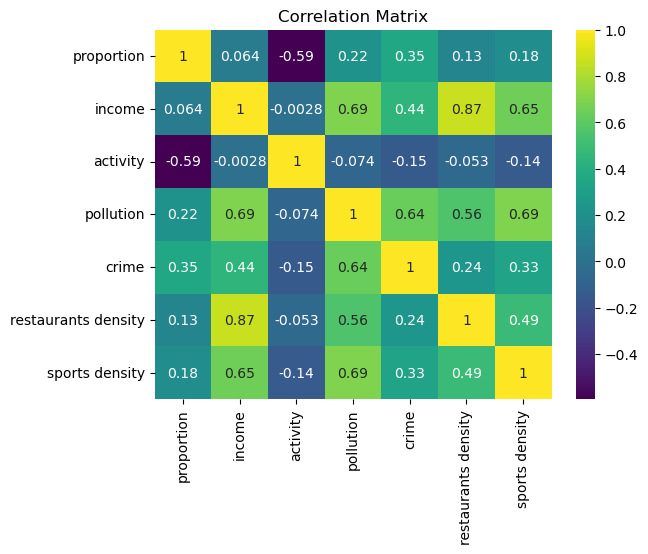

In [34]:
sns.heatmap(data_visualization[numerical_col].corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

This correlation matrix shows the correlation between factors such as children obesity rates, income, rates of physical activity participation, rates of population exposure to pollution, crime rate per 1000 people, restaurant density and sports facility density.

Obesity rate shows a strong negative correlation with physical activity participation (-0.59), showing that boroughs with higher levels of physical activity have lower obesity rates. This reflects that increasing physical activities can reduce obesity issues. Obesity rate has a mild positive correlation with pollution (0.22), which may suggest that in boroughs with poor air quality, children have higher obesity rates. This could be related to reduced physical activities. The positive correlation with crime rate (0.35) indicates that in boroughs with higher crime rates, obesity rates also tend to be higher. This may be due to unsafe neighborhoods that limit residents' outdoor activities and thus reduce the amount of physical activity. 

The relationship between physical activity participation and pollution is weakly negative (-0.074), possibly indicating that residents are more likely to engage in outdoor activities in boroughs with better air quality. These weaker correlations suggest that physical activity participation does not directly correlate with income levels and fast food restaurant density. 

D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


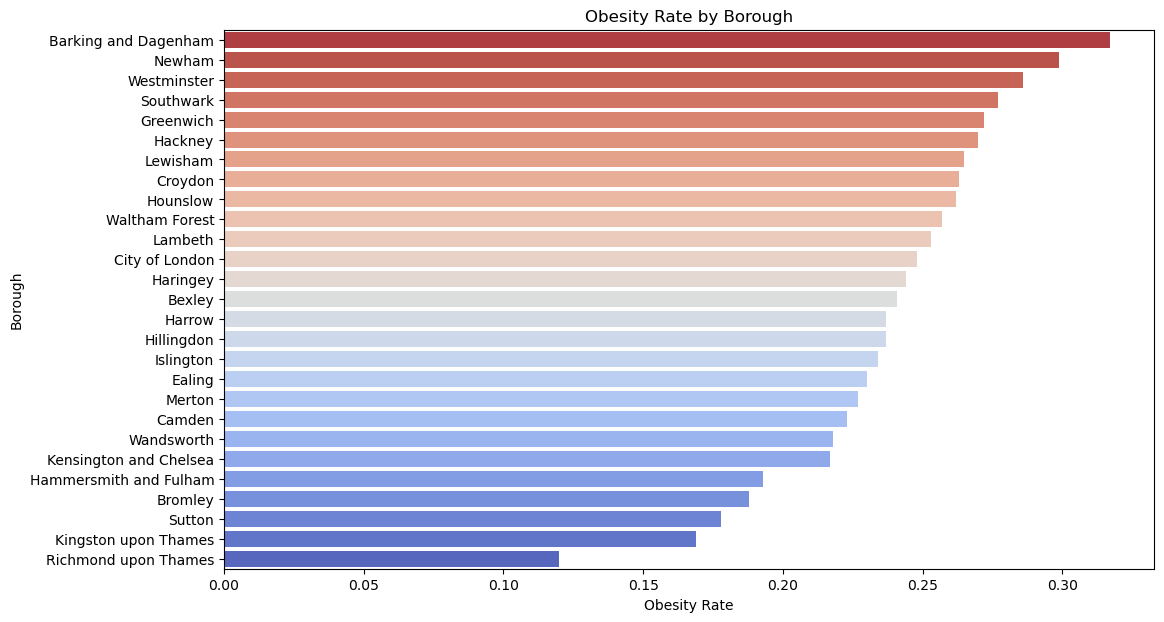

In [35]:
data_visualization = data_visualization.sort_values(by='proportion', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(y='name', x='proportion', data=data_visualization, palette='coolwarm_r')
plt.title('Obesity Rate by Borough')
plt.xlabel('Obesity Rate')
plt.ylabel('Borough')
plt.show()

This above chart shows the obesity rates in Year 6 Children across London boroughs, represented as a bar chart sorted from the highest to lowest. We can quickly identify which boroughs face obesity challenges. For example, Barking and Dagenham has the highest obesity rate, while Richmond upon Thames has the lowest. 

D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


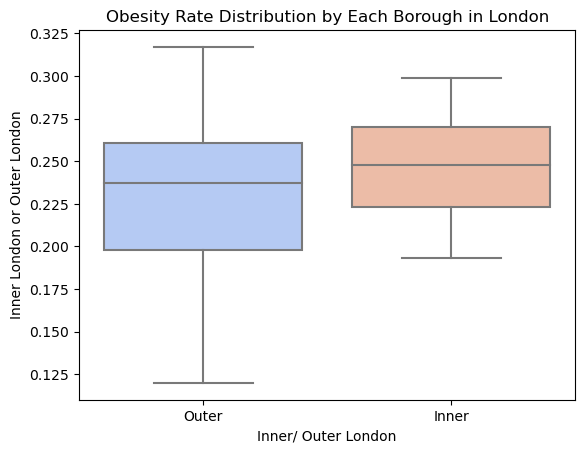

In [36]:
sns.boxplot(data=data_visualization, x='Inner/ Outer London', y='proportion', palette='coolwarm')
plt.title('Obesity Rate Distribution by Each Borough in London')
plt.ylabel('Obesity Rate')
plt.ylabel('Inner London or Outer London')
plt.show()

This box plot compares the distribution of obesity rates between inner and outer London boroughs. It can be found that the obesity rates in the inner boroughs are generally higher, and the median and distribution range are also higher and broader. This suggests that the urban environment may have an impact on the health status of children. We can explore the differences in the urban environment between inner and outer London between inner and outer London boroughs to understand the possible factors influencing childhood obesity rates.

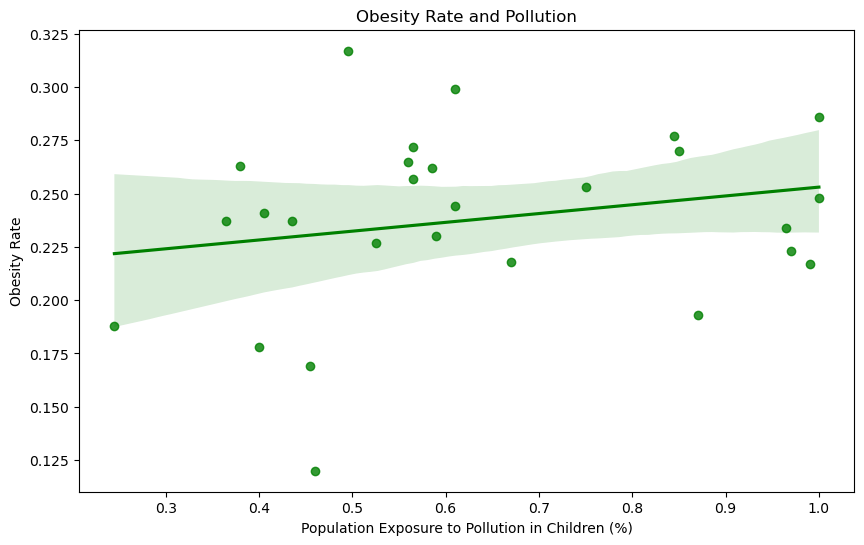

In [37]:
plt.figure(figsize=(10, 6))

sns.regplot(x='pollution', y='proportion', data=data_visualization, color='green')
plt.title('Obesity Rate and Pollution')
plt.xlabel('Population Exposure to Pollution in Children (%)')
plt.ylabel('Obesity Rate')
plt.show()

This above scatter plot shows the relationship between the proportion of children exposed to pollution and obesity rates. It can be seen from the trend line that as pollution exposure in children increases, the obesity rate shows a slight increase. This may suggest that air quality may directly or indirectly affect childhood obesity rates.

D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\L

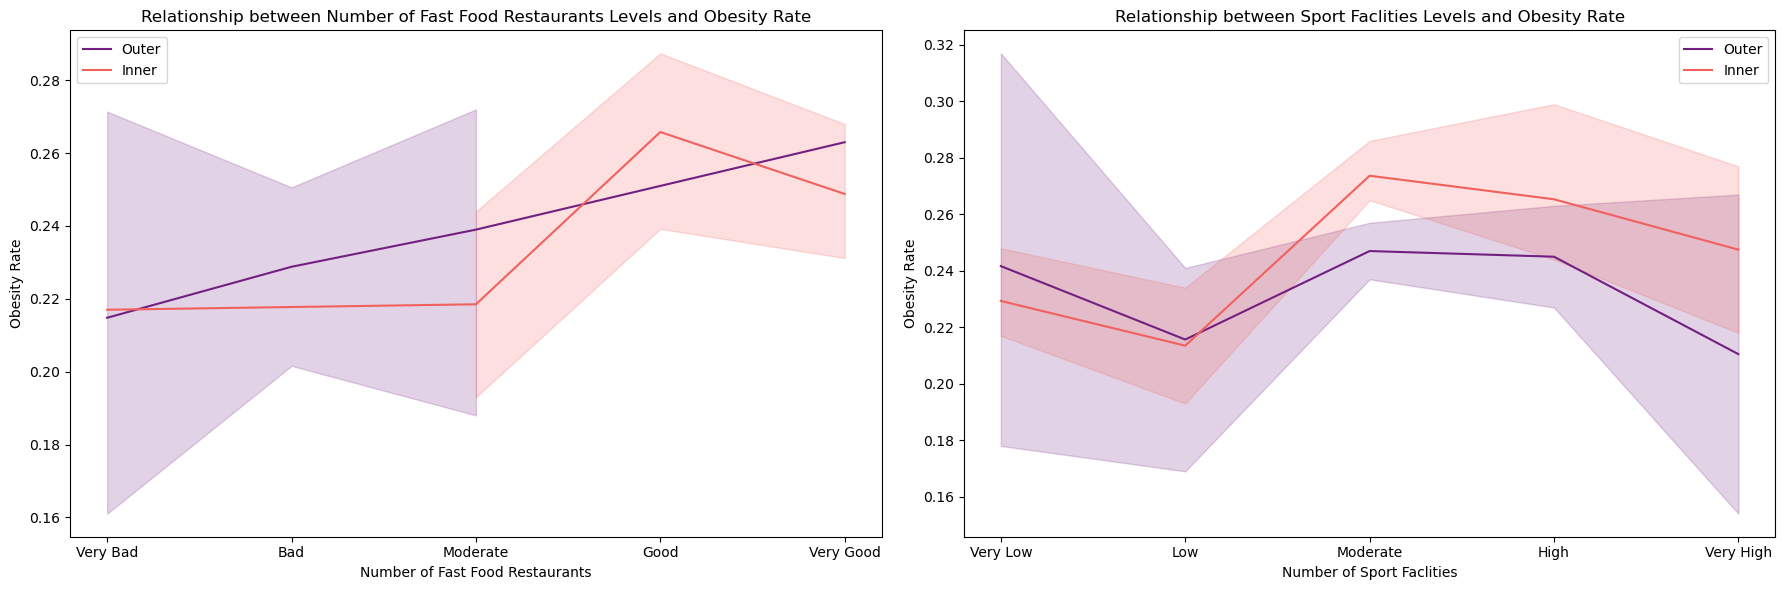

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.lineplot(x='restaurants_level', y='proportion', hue='Inner/ Outer London', data=data_visualization, palette='magma', ax=ax[0])
ax[0].set_title('Relationship between Number of Fast Food Restaurants Levels and Obesity Rate')
ax[0].set_xlabel('Number of Fast Food Restaurants')
ax[0].set_ylabel('Obesity Rate')
ax[0].legend(loc='upper left')

sns.lineplot(x='sports_level', y='proportion', hue='Inner/ Outer London', data=data_visualization, palette='magma', ax=ax[1])
ax[1].set_title('Relationship between Sport Faclities Levels and Obesity Rate')
ax[1].set_xlabel('Number of Sport Faclities')
ax[1].set_ylabel('Obesity Rate')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

The two line charts show the relationship between the number of fast food restaurants and the number of physical activity facilities and obesity rates respectively, differentiated by inner and outer boroughs. As can be seen from the chart that as the number of fast food restaurants increases obesity rates tend to rise in outer areas. Obesity rates in both areas decrease as the number of sport facilities increases. This reveals the potential impact of lifestyle factors on obesity rates.

D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

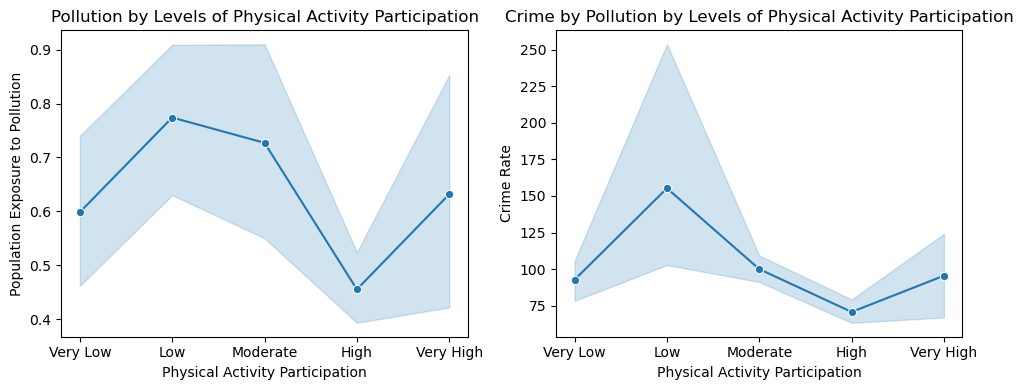

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.lineplot(x='activity_level', y='pollution', data=data_visualization, marker='o', ax=axs[0])
axs[0].set_title('Pollution by Levels of Physical Activity Participation')
axs[0].set_xlabel('Physical Activity Participation')
axs[0].set_ylabel('Population Exposure to Pollution')

sns.lineplot(x='activity_level', y='crime', data=data_visualization, marker='o', ax=axs[1])
axs[1].set_title('Crime by Pollution by Levels of Physical Activity Participation')
axs[1].set_xlabel('Physical Activity Participation')
axs[1].set_ylabel('Crime Rate')

plt.tight_layout()
plt.show()

This set of plots provides a comprehensive insight of crime rate and pollution exposure to population at different levels of physical activity participation (LPAP).

The left chart shows higher levels of pollution in boroughs with very low and low LPAP. Although boroughs with high and very high LPAP have increased levels of pollution, overall levels were still lower than in the boroughs with low LPAP. This might be related to higher population density. In the right chart, boroughs with very low LPAP have the highest crime rates, showing that high crime rates may have a negative effect on physical activity participation. In boroughs with high and very high LPAP, crime rates continued to decline and then increased slightly, possibly due to the complexity of the community and various social dynamics.

Hence, crime rates and pollution exposure to population may affect LPAP, which in turn affects childhood obesity rates.

D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Leeds\software\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


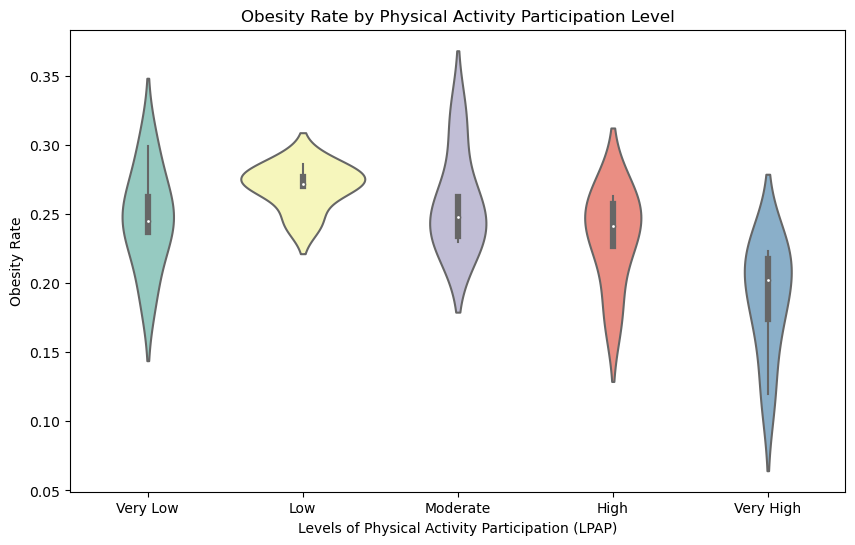

In [40]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='activity_level', y='proportion', data=data_visualization, palette='Set3')
plt.title('Obesity Rate by Physical Activity Participation Level')
plt.xlabel('Levels of Physical Activity Participation (LPAP)')
plt.ylabel('Obesity Rate')
plt.show()

This above violin plot shows the distribution of obesity rates across different levels of physical activity participation (LPAP) in children.


The group with very low LPAP has higher obesity rates with a median of around 0.25 and a maximum of nearly 0.35. This may show that a lack of LPAP is associated with higher rates of obesity. The results of the groups with moderate and high LPAP show that moderate participation in physical activity have a positive influence in reducing obesity rates. In the group with very high LPAP, although the median of the obesity rates was similar to the group with high LPAP, the distribution was slightly wider, possibly indicating some variability in obesity rates within this group. 

This chart suggests a significant correlation between levels of physical activity participation and obesity rates, showing the potential positive impact of increased physical activity on reducing obesity rates. 

D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Leeds\software\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


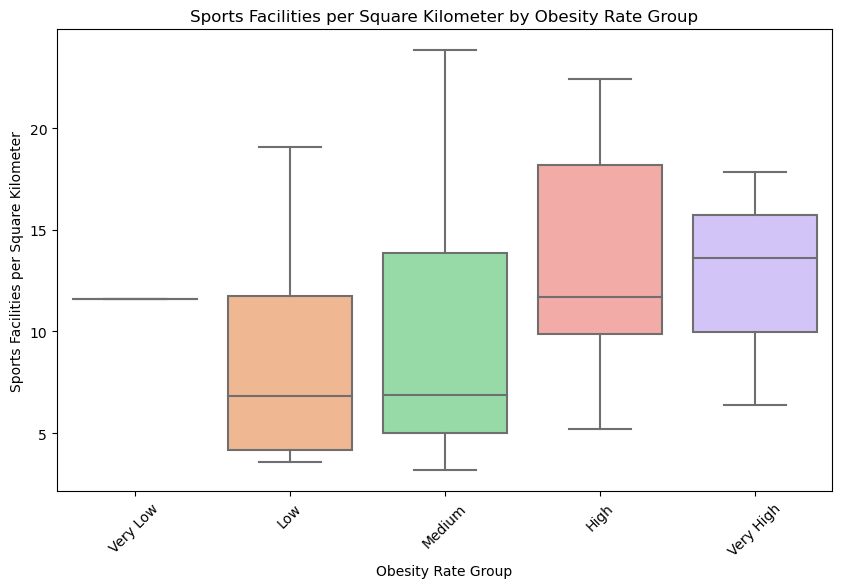

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='proportion_group', y='sports density', data=data_visualization, palette='pastel')

plt.title('Sports Facilities per Square Kilometer by Obesity Rate Group')
plt.xlabel('Obesity Rate Group')
plt.ylabel('Sports Facilities per Square Kilometer')
plt.xticks(rotation=45) 
plt.show()

This above box chart shows the density of sports facilities per square kilometerin across different obesity rate groups.

As can be seen from the plot, the "Very Low" obesity rate group has relatively fewer sports facilities in terms of median and overall distribution. However, as obesity rates increase to "Low" and "Medium," the number of sports facilities significantly increases, suggesting that these boroughs might have more resources to support physical activity among children. There was a decline in the number of sports facilities in the "High" obesity rate group, and a slight increase in the number of sports facilities in the "Very High" obesity rate group.

This result reveals the correlation between the distribution of sports facilities and children obesity rates. It suggests that increasing the availability of sports facilities may help reduce children obesity rates.

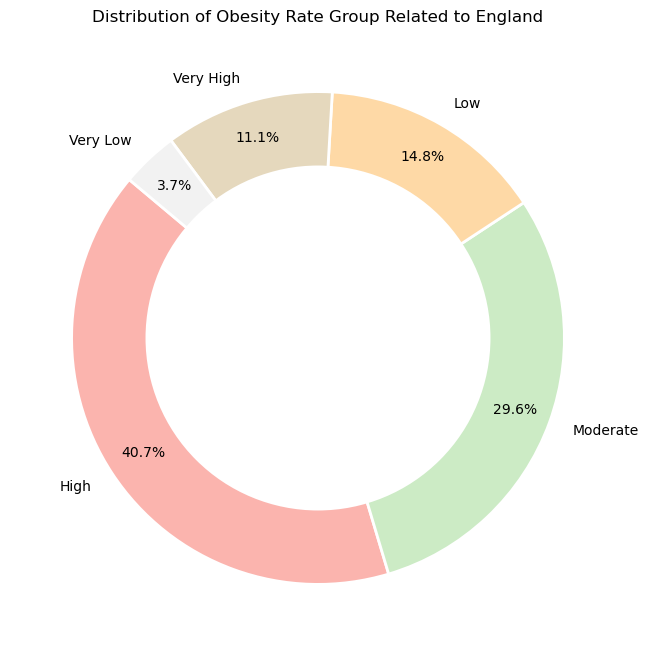

In [42]:
plt.figure(figsize=(8, 8))
proportion_counts = data_visualization['proportion_group_uk'].value_counts()
colors = plt.cm.Pastel1(np.linspace(0, 1, len(proportion_counts)))
plt.pie(proportion_counts, labels=proportion_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'linewidth': 2, 'edgecolor': 'white'}, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Obesity Rate Group Related to England')
plt.show()

The circular chart breaks down the gap in childhood obesity rates between London boroughs and the UK as a whole into ranges: very low, low, medium, high and very high.  

Very Low (3.7%) and Low (14.8%) take up a relatively small proportion, showing that only a few boroughs in London have childhood obesity rates  below the national average. This may be due to better health environmental resources and economic conditions. Very High (11.1%) and High (40.7%) make up a large proportion. This shows that many boroughs in London have children obesity rates far above the national average. This might indicate that in these boroughs, children's nutrition and physical activity require special attention and intervention to address these challenges.

D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Leeds\software\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
D:\Leeds\software\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Leeds\software\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future 

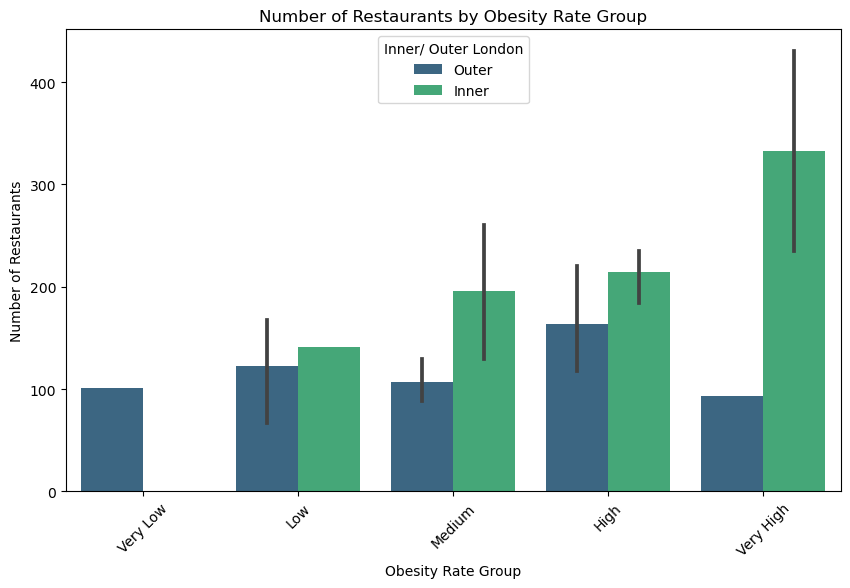

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='proportion_group', y='restaurants', hue='Inner/ Outer London',data=data_visualization, palette='viridis')
plt.title('Number of Restaurants by Obesity Rate Group')
plt.xlabel('Obesity Rate Group')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

This above bar chart shows the number of restaurants in inner and outer boroughs of London with different levels of obesity rate. 

As the number of fast food restaurants has increased, so has the obesity rate in inner boroughs of London. This may suggest that the increasing number of restaurants may be associated with obesity rates in the inner boroughs, possibly due to high-density fast food restaurant areas offering more options for high-calorie, high-fat foods. However, in the outer boroughs of London, the number of fast food restaurants is more evenly distributed across different levels of obesity rates.

## 4. Data Analysis

### 4.1 Predicting models

To solve research question two - Which machine learning model performs better in effectively predicting childhood obesity rates in this research, we plan to create three different prediction models and then compare the performance of each model.

In [68]:
data_modeling=data.copy()

# Selecting features and target variable
features = ['income', 'activity', 'pollution', 'crime', 'restaurants density', 'sports density']

scaler = StandardScaler()
data_modeling[features+['proportion']] = scaler.fit_transform(data_modeling[features+['proportion']])

X = data_modeling[features]
y = data_modeling['proportion']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Initialize the RandomForestRegressor
model_RandomForest = RandomForestRegressor(random_state=42)
model_RandomForest.fit(X_train, y_train)
y_pred_RandomForest = model_RandomForest.predict(X_test)

# Evaluate the model performance
r2_RandomForest = r2_score(y_test, y_pred_RandomForest)
mse_RandomForest = mean_squared_error(y_test, y_pred_RandomForest)

print(f"Random Forest R²: {r2_RandomForest}")
print(f"Random Forest MSE: {mse_RandomForest}")

Random Forest R²: 0.2643377045775528
Random Forest MSE: 1.1375392217672353


After the initial evaluation of the performance of the Random Forest model by calculating Coefficient of Determination and Mean Square Error, we can find that the Coefficient of Determination(R²) of the Random Forest model is only 0.26. 

Hence, we plan to optimize the model by manually tuning the parameters and utilizing grid search to identify the optimal parameters.

In [70]:
# Random Forest Optimization

param_RandomForest = {
     'n_estimators': [100, 200, 300,400],
     'max_depth': [10, 20, 30,40],
     #'min_samples_split': [2, 5, 10],
     #'min_samples_leaf': [1, 2, 4,6],
     'max_leaf_nodes': [None, 50, 100]
}

# Initialize the Random Forest Regressor and GridSearchCV
grid_RandomForest = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_RandomForest,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2
)

grid_RandomForest.fit(X_train, y_train)
print("Best parameters for Random Forest: ", grid_RandomForest.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=10, max_leaf_nodes=None, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_leaf_nodes=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=None, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=None, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_leaf_nodes=None, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_leaf_nodes=None, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_leaf_nodes=None, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_leaf_nodes=None, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_leaf_nodes=None, n_estimators=400; total time=   0.5s
[CV] END max_depth=10, max_leaf_nodes=None, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_leaf_nodes=None, n_e

[CV] END .max_depth=30, max_leaf_nodes=100, n_estimators=200; total time=   0.1s
[CV] END .max_depth=30, max_leaf_nodes=100, n_estimators=300; total time=   0.2s
[CV] END .max_depth=30, max_leaf_nodes=100, n_estimators=300; total time=   0.2s
[CV] END .max_depth=30, max_leaf_nodes=100, n_estimators=300; total time=   0.2s
[CV] END .max_depth=30, max_leaf_nodes=100, n_estimators=400; total time=   0.4s
[CV] END .max_depth=30, max_leaf_nodes=100, n_estimators=400; total time=   0.4s
[CV] END .max_depth=30, max_leaf_nodes=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=40, max_leaf_nodes=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_leaf_nodes=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_leaf_nodes=None, n_estimators=100; total time=   0.0s
[CV] END max_depth=40, max_leaf_nodes=None, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_leaf_nodes=None, n_estimators=200; total time=   0.1s
[CV] END max_depth=40, max_l

We can find that the best parameter setting of the Random Forest model is: 10 of max_depth, 400 of n_estimators.

In [71]:
# Create a Random Forest model instance using the best parameters
best_RandomForest = RandomForestRegressor(
    n_estimators=grid_RandomForest.best_params_['n_estimators'],
    max_depth=grid_RandomForest.best_params_['max_depth'],
    #min_samples_leaf=grid_RandomForest.best_params_['min_samples_leaf'],
    #min_samples_split=grid_RandomForest.best_params_['min_samples_split'],
    max_leaf_nodes=grid_RandomForest.best_params_['max_leaf_nodes'],
    random_state=42
)

best_RandomForest.fit(X_train, y_train)
y_pred_best_RandomForest = best_RandomForest.predict(X_test)
r2_best_RandomForest = r2_score(y_test, y_pred_best_RandomForest)
mse_best_RandomForest = mean_squared_error(y_test, y_pred_best_RandomForest)

print(f"Optimized Random Forest R²: {r2_best_RandomForest}")
print(f"Optimized Random Forest MSE: {mse_best_RandomForest}")

Optimized Random Forest R²: 0.3030930254112324
Optimized Random Forest MSE: 1.0776126796910674


After parameter optimization, the performance of the model is improved but not significantly.

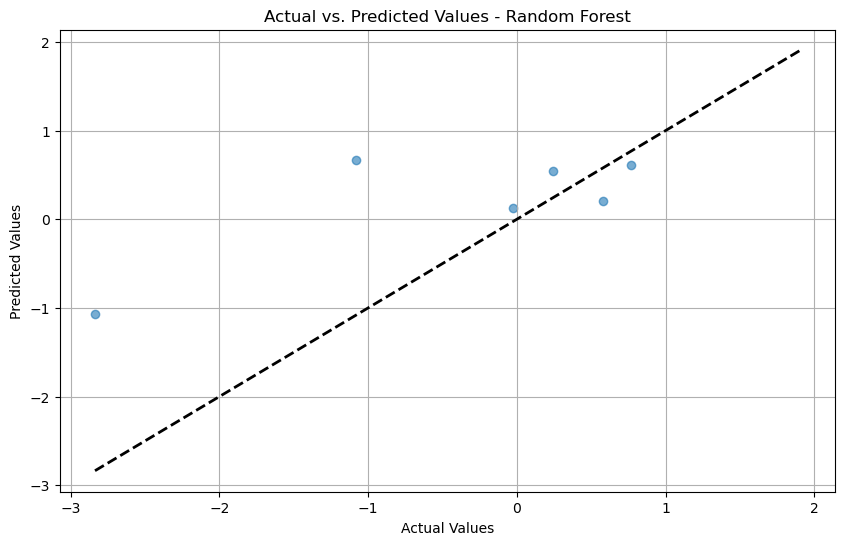

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_RandomForest, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Random Forest')
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [73]:
# Initialize the GradientBoostingRegressor
model_GradientBoosting = GradientBoostingRegressor(random_state=42)
model_GradientBoosting.fit(X_train, y_train)
y_pred_GradientBoosting = model_GradientBoosting.predict(X_test)

r2_GradientBoosting = r2_score(y_test, y_pred_GradientBoosting)
mse_GradientBoosting = mean_squared_error(y_test, y_pred_GradientBoosting)

print(f"Gradient Boosting R²: {r2_GradientBoosting}")
print(f"Gradient Boosting MSE: {mse_GradientBoosting}")

Gradient Boosting R²: 0.4567488202555261
Gradient Boosting MSE: 0.8400179376813081


We can find that the Coefficient of Determination(R²) of the Gradient Boosting model is around 0.46. This result is even higher than the optimized Random Forest model. 

In [74]:
# Gradient Boosting Optimization
param_GradientBoosting = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1,0.5,1],
    'max_depth': (3,10,1),
    #'min_samples_split': np.arange(2,20,2),
    #'min_samples_leaf': np.arange(1,10,1)
}

# Initialize the Gradient Boosting Regressor and GridSearchCV
optimization_GradientBoosting = GradientBoostingRegressor(random_state=42)
grid_GradientBoosting = GridSearchCV(estimator=optimization_GradientBoosting, 
                                     param_grid=param_GradientBoosting, 
                                     cv=3, 
                                     scoring='neg_mean_squared_error', 
                                     verbose=2)

# Perform the grid search
grid_GradientBoosting.fit(X_train, y_train)

# Output the best parameters found by GridSearchCV
print("Best parameters for Gradient Boosting: ", grid_GradientBoosting.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.1, max_depth=10, n_es

It can be found that the best parameter setting of the Gradient Boosting model is: 0.5 of learning_rate, 100 of n_estimators , and 3 of max_depth.

In [75]:
# Using the best parameters to create an instance of the Gradient Boosting Regressor
best_GradientBoosting = GradientBoostingRegressor(
    n_estimators=grid_GradientBoosting.best_params_['n_estimators'],
    learning_rate=grid_GradientBoosting.best_params_['learning_rate'],
    max_depth=grid_GradientBoosting.best_params_['max_depth'],
    #min_samples_split=grid_GradientBoosting.best_params_['min_samples_split'],
    #min_samples_leaf=grid_GradientBoosting.best_params_['min_samples_leaf']
)

best_GradientBoosting.fit(X_train, y_train)
y_pred_best_GradientBoosting = best_GradientBoosting.predict(X_test)
r2_best_GradientBoosting = r2_score(y_test, y_pred_best_GradientBoosting)
mse_best_GradientBoosting = mean_squared_error(y_test, y_pred_best_GradientBoosting)

print(f"Optimized Gradient Boosting R²: {r2_best_GradientBoosting}")
print(f"Optimized Gradient Boosting MSE: {mse_best_GradientBoosting}")

Optimized Gradient Boosting R²: 0.5604693150438604
Optimized Gradient Boosting MSE: 0.6796371058009926


After parameter optimization, the performance of the Gradient Boosting model is improved to 0.55 in terms of Coefficient of Determination.

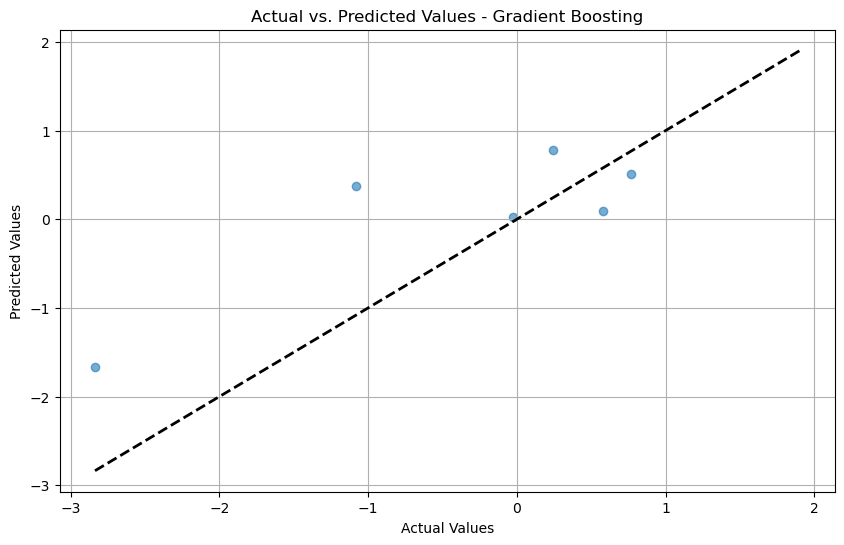

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_GradientBoosting, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Gradient Boosting')
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [77]:
# Instantiate an XGBoost regressor object
model_XGB = xgb.XGBRegressor(random_state=42)
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)

r2_XGB = r2_score(y_test, y_pred_XGB)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)

print(f"XGBoost R²: {r2_XGB}")
print(f"XGBoost MSE: {mse_XGB}")

XGBoost R²: 0.2387297018845449
XGBoost MSE: 1.177136340765552


At this moment, the performance of the XGBoost model is the worst one.

In [78]:
# Adjusted parameter grid for XGBoost
param_XGB = {
     #'colsample_bytree': [0.3, 0.5, 0.7, 0.9],
     'learning_rate': [0.01, 0.03, 0.05],
     'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300],
    #'subsample': [0.5, 0.7, 0.9], 
    'min_child_weight': [1, 3, 5],
    #'gamma': [0, 0.1, 0.2]  
}

# Initialize the XGBoost regressor and GridSearchCV
optimization_XGB = XGBRegressor(random_state=42)
grid_XGB = GridSearchCV(
    estimator=optimization_XGB,
    param_grid=param_XGB,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2 
)

grid_XGB.fit(X_train, y_train)
print("Best parameters for XGBoost: ", grid_XGB.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_c

[CV] END learning_rate=0.03, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.03, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.03, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.03, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.03, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.03, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=200; total time=   0.0s
[CV] END l

[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=200; total time=   0.0s
[CV] END l

It can be found that the best parameter setting of the Gradient Boosting Optimization model is: 0.5 of learning_rate, 100 of n_estimators , and 3 of max_depth, and 3 of min_child_weight.

In [79]:
best_XGB = xgb.XGBRegressor(
    #colsample_bytree=grid_XGB.best_params_['colsample_bytree'],
    learning_rate=grid_XGB.best_params_['learning_rate'],
    max_depth=grid_XGB.best_params_['max_depth'],
    n_estimators=grid_XGB.best_params_['n_estimators'],
    #gamma=grid_XGB.best_params_['gamma'],
    min_child_weight=grid_XGB.best_params_['min_child_weight'],
    #subsample=grid_XGB.best_params_['subsample'],
    random_state=42
)

best_XGB.fit(X_train, y_train) 
y_pred_best_XGB = best_XGB.predict(X_test)
r2_best_XGB = r2_score(y_test, y_pred_best_XGB)
mse_best_XGB = mean_squared_error(y_test, y_pred_best_XGB)

print(f"Optimized XGBoost R²: {r2_best_XGB}")
print(f"Optimized XGBoost MSE: {mse_best_XGB}")

Optimized XGBoost R²: 0.3232414249615857
Optimized XGBoost MSE: 1.0464576308500735


The performance of the XGBoost model improved greatly, and the level of improvement was higher than that of the Random Forest model.

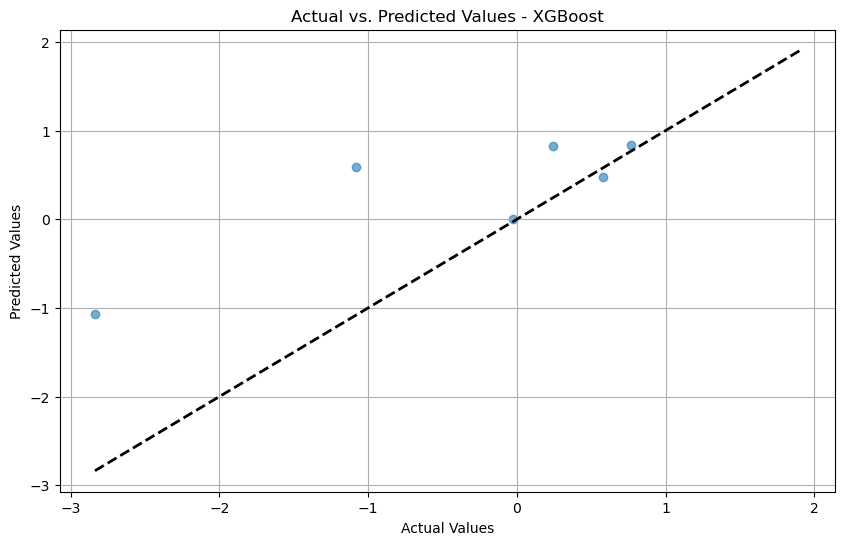

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_XGB, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - XGBoost')
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

For a clearer view of the changes in the three models before and after optimization, as well as to evaluate the best models, we can plot a bar chart to visualize the metrics of each model.

In [81]:
# Old scores
old_r2_scores = [r2_RandomForest, r2_GradientBoosting, r2_XGB]
old_mse_scores = [mse_RandomForest, mse_GradientBoosting, mse_XGB]

# New scores
new_r2_scores = [r2_best_RandomForest, r2_best_GradientBoosting, r2_best_XGB]
new_mse_scores = [mse_best_RandomForest, mse_best_GradientBoosting,mse_best_XGB]

models = ['Random Forest', 'Gradient Boosting', 'XGBoost']

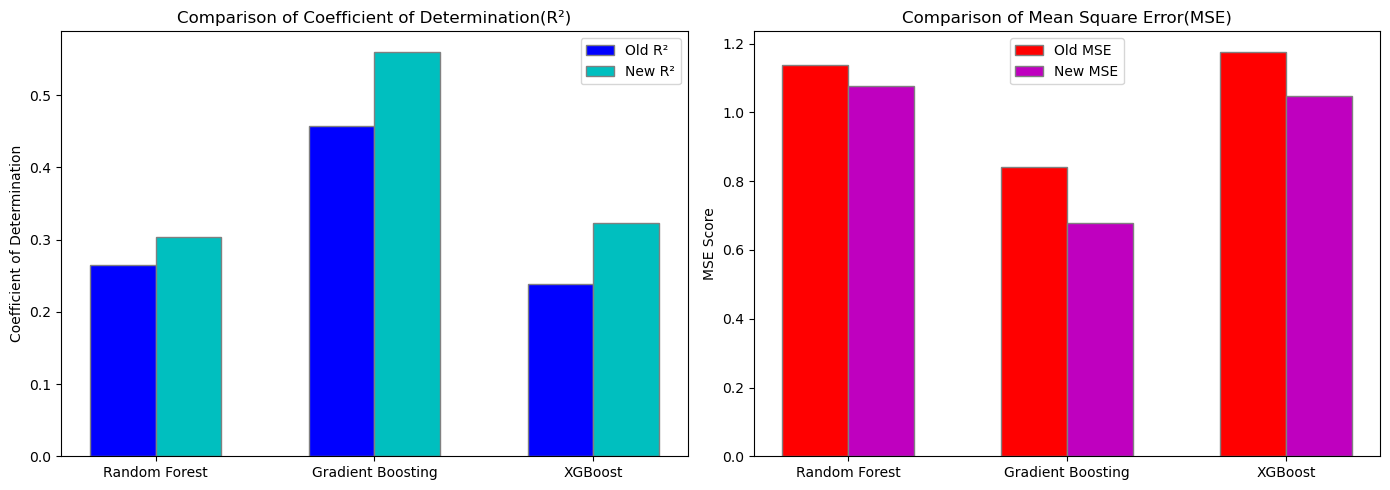

In [82]:
barWidth = 0.3

# Set the position of the bar on the X-axis
r1 = np.arange(len(old_r2_scores))
r2 = [x + barWidth for x in r1]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Create bars for R² scores
ax[0].bar(r1, old_r2_scores, color='b', width=barWidth, edgecolor='grey', label='Old R²')
ax[0].bar(r2, new_r2_scores, color='c', width=barWidth, edgecolor='grey', label='New R²')

ax[0].set_title('Comparison of Coefficient of Determination(R²)')
ax[0].set_ylabel('Coefficient of Determination')
ax[0].set_xticks([r + barWidth/2 for r in range(len(old_r2_scores))])
ax[0].set_xticklabels(models)
ax[0].legend()

# Create bars for MSE scores
ax[1].bar(r1, old_mse_scores, color='r', width=barWidth, edgecolor='grey', label='Old MSE')
ax[1].bar(r2, new_mse_scores, color='m', width=barWidth, edgecolor='grey', label='New MSE')
ax[1].set_title('Comparison of Mean Square Error(MSE)')
ax[1].set_ylabel('MSE Score')
ax[1].set_xticks([r + barWidth/2 for r in range(len(old_mse_scores))])
ax[1].set_xticklabels(models)
ax[1].legend()

plt.tight_layout()
plt.show()

These two plots show the performance of three different models including the Random Forest model, the Gradient Boosting model, and the XGBoost model using new and old parameters.

In the plot of the coefficient of determination (R²), we can see that the new parameter has a higher R² value in all three models, showing that the new parameter provides a better fit to the model. Especially, the Gradient Boosting model has the best performance. 

In the plot of the mean square error(MSE), we can found that the new parameter significantly reduces MSE in the XGBoost model and the Gradient Boosting model, while it also reduces MSE in the Random Forest model, but to a lesser extent.

However, all the models still need to be optimized in the future by incorporating more comprehensive data.

### 4.2 Clustering models

To streamline the urban planning process for boroughs with similar characteristics and address research question 3 -  What substantial suggestions can we provide to lower childhood obesity rates, we plan to create two clustering models.

C:\Users\111\AppData\Local\Temp\ipykernel_20268\1254558116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Inner_Outer_Flag'] = data['Inner/ Outer London'].apply(lambda x: 1 if x == 'Inner' else 0)
D:\Leeds\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Leeds\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(

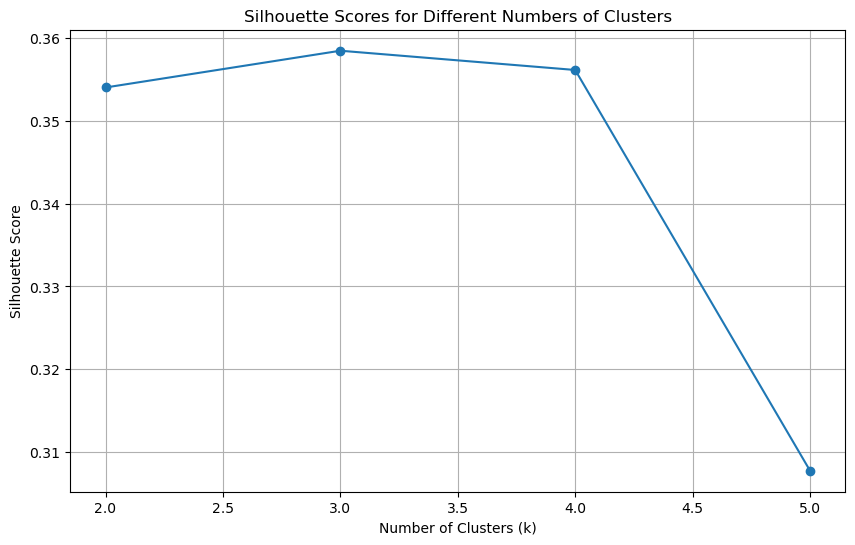

In [59]:
data['Inner_Outer_Flag'] = data['Inner/ Outer London'].apply(lambda x: 1 if x == 'Inner' else 0)

data_clustering_scaled = data[numerical_col+['Inner_Outer_Flag']]

# Standardize the data to have mean=0 and variance=1
scaler = StandardScaler()
data_clustering_scaled = scaler.fit_transform(data_clustering_scaled)

silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_clustering_scaled)
    silhouette_avg = silhouette_score(data_clustering_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Visualize the silhouette scores to determine the best number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [60]:
# Select the number of clusters with the highest silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters (k) is: {best_k}")

Best number of clusters (k) is: 3


After visualization, it can be found that the performance of the K-means model is the best. when all boroughs are divided into 3 clusters.

In [61]:
# Create a K-means model with the best number of clusters
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
best_kmeans.fit(data_clustering_scaled)
data_clustering=data.copy()
data_clustering['Cluster_kmeans'] = best_kmeans.labels_
data_clustering.head()

D:\Leeds\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Leeds\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Code,name,Inner/ Outer London,proportion,income,activity,pollution,crime,restaurants density,sports density,Inner_Outer_Flag,Cluster_kmeans
0,E09000001,City of London,Inner,0.248,61984,0.446508,1.000,102.223697,84.023948,21.350347,1,2
1,E09000002,Barking and Dagenham,Outer,0.317,34430,0.441950,0.495,98.273918,2.575620,6.397507,0,1
2,E09000004,Bexley,Outer,0.241,36852,0.471500,0.405,64.922838,1.601171,5.183172,0,1
3,E09000006,Bromley,Outer,0.188,39871,0.503000,0.245,69.605696,1.112333,4.336101,0,1
4,E09000007,Camden,Inner,0.223,45326,0.514667,0.970,153.626369,12.070147,7.021797,1,0


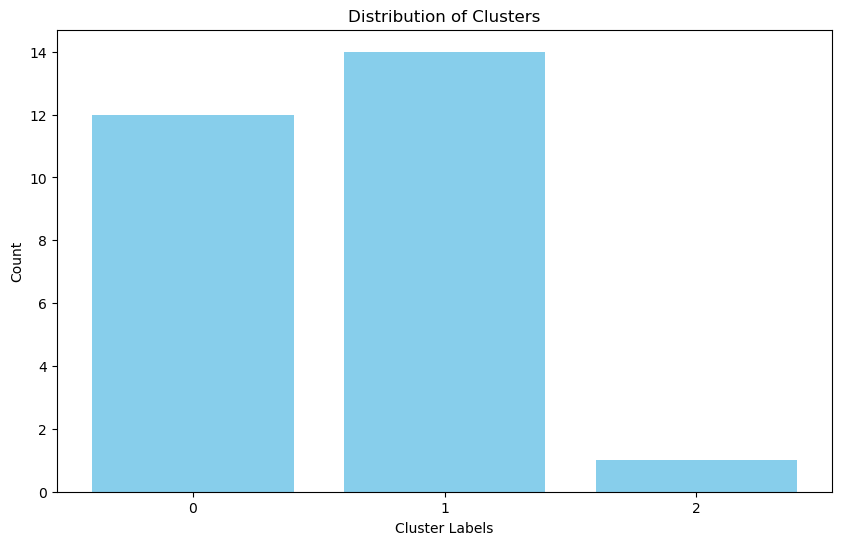

In [62]:
cluster_counts = data_clustering['Cluster_kmeans'].value_counts()

plt.figure(figsize=(10, 6)) 
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster Labels')
plt.ylabel('Count')
plt.title('Distribution of Clusters')
plt.xticks(cluster_counts.index)
plt.show()

This chart displays the distribution of clusters. The chart shows that the Cluster 1 contains the most boroughs, whereas clusters 2 has the fewest. Most of the boroughs belong to cluster 0 and cluster 1, so cluster 2 is a special case worth discussing.

In [63]:
# Initialize and fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data_clustering_scaled)

# Predict the cluster each sample belongs to
data_clustering['Cluster_GMM'] = gmm.predict(data_clustering_scaled)
data_clustering.head()

D:\Leeds\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Code,name,Inner/ Outer London,proportion,income,activity,pollution,crime,restaurants density,sports density,Inner_Outer_Flag,Cluster_kmeans,Cluster_GMM
0,E09000001,City of London,Inner,0.248,61984,0.446508,1.000,102.223697,84.023948,21.350347,1,2,2
1,E09000002,Barking and Dagenham,Outer,0.317,34430,0.441950,0.495,98.273918,2.575620,6.397507,0,1,1
2,E09000004,Bexley,Outer,0.241,36852,0.471500,0.405,64.922838,1.601171,5.183172,0,1,1
3,E09000006,Bromley,Outer,0.188,39871,0.503000,0.245,69.605696,1.112333,4.336101,0,1,1
4,E09000007,Camden,Inner,0.223,45326,0.514667,0.970,153.626369,12.070147,7.021797,1,0,0


In [64]:
# Calculating silhouette score for K-means clustering
silhouette_kmeans = silhouette_score(data_clustering_scaled, data_clustering['Cluster_kmeans'])
print(silhouette_kmeans)

0.3584852559028891


In [65]:
# Calculating silhouette score for Gaussian Mixture Model (GMM) clustering
silhouette_gmm = silhouette_score(data_clustering_scaled, data_clustering['Cluster_GMM'])
print(silhouette_gmm)

0.3584852559028891


By comparing the silhouette score of the two models, we can see that both models perform equally well.

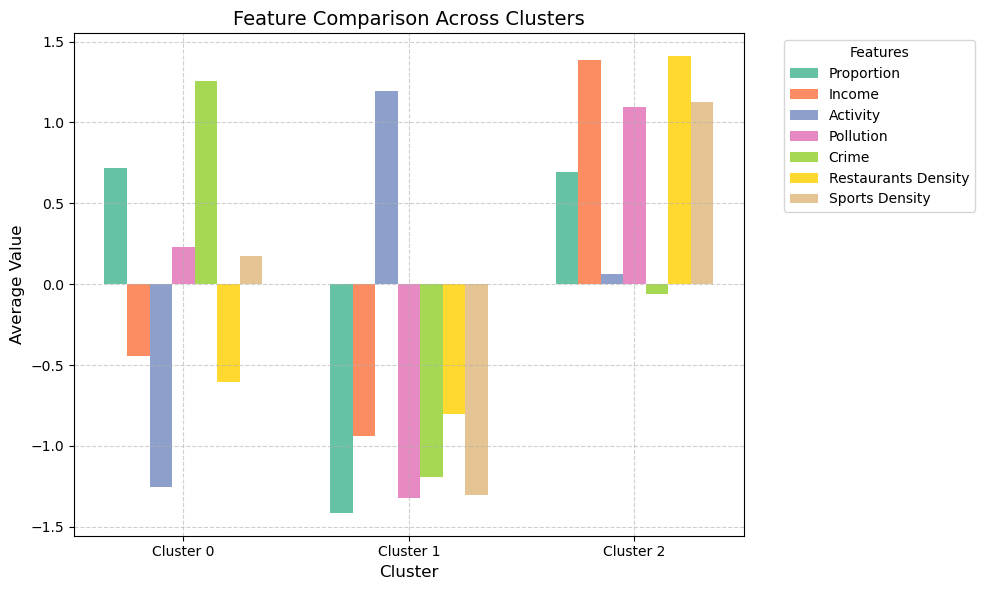

In [66]:
titles = ['Proportion', 'Income', 'Activity', 'Pollution', 'Crime', 'Restaurants Density', 'Sports Density']

cluster_means = data_clustering.groupby('Cluster_kmeans')[numerical_col].mean()
scaler = StandardScaler()
cluster_means_scaled = scaler.fit_transform(cluster_means)
cluster_means_scaled = pd.DataFrame(cluster_means_scaled, columns=cluster_means.columns)


fig, ax = plt.subplots(figsize=(10, 6))
width = 0.1
n = len(cluster_means_scaled.index)
indices = np.arange(n)

colors = plt.get_cmap('Set2')

for i, (feature, title) in enumerate(zip(numerical_col, titles)):
    offsets = [x + i * width for x in indices]
    ax.bar(offsets, cluster_means_scaled[feature], width=width, color=colors(i), label=title)

ax.set_title('Feature Comparison Across Clusters', fontsize=14)
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Average Value', fontsize=12)
ax.set_xticks([x + width * (len(numerical_col) - 1) / 2 for x in indices])
ax.set_xticklabels(['Cluster {}'.format(i ) for i in indices])
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Some boroughs belonging to Cluster 0, such as Lambeth and Southwark, have high childhood rates, lower sports facilities density and the percentage of physical activity participation. Governments could build more indoor sports facilities with policing monitoring in these boroughs due to high crime rates. Also, they may need to conduct effective policing strategies and environmental protection measures to reduce crime rates and improve air quality, thereby improving children’s participation in physical activity and lowering childhood obesity rates.

For Cluster 1, such as Barking and Dagenham, these boroughs show lower childhood obesity rates and higher percentages of physical activity participation. Governments may conduct some education workshops related to healthy diets due to lower socioeconomic conditions, and help low-income families get access to healthier foods and sports facilities.

The City of London is the only borough belonging to Cluster 2. Although sports facilities density is higher and crime is lower, the percentage of physical activity participation is lower and childhood obesity rates are higher, this may be due to higher pollution influencing the children’s motivation for outdoor activities. Governments can conduct environmental policies to improve air quality and make outdoor environments more suitable for activities. For example, enhancing green spaces and blue spaces near the neighbourhood and limiting the increasing number of fast-food restaurants.
